In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Как и в предыдущей задаче перед тем как создавать алгоритм для начала проведем разведочный анализ данных.

# Подготовка данных

In [2]:
data = pd.read_excel('Testovoe_data.xlsx', sheet_name=3)

In [4]:
data.head()

,player,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat8,stat9,...,stat118,stat119,stat120,stat121,stat122,stat123,stat124,stat125,stat126,stat127
0,gr_player1,0.000000,0.551756,NaN,0.227376,0.089159,NaN,0.625330,NaN,0.080153,...,0.450982,0.205062,0.326149,0.255466,0.294282,0.002488,NaN,0.265898,NaN,NaN
1,gr_player2,0.000000,0.559532,NaN,0.197149,0.109987,NaN,0.685624,NaN,0.120219,...,0.438461,0.223621,0.325301,0.274218,0.289307,0.013705,NaN,0.251024,NaN,NaN
2,gr_player3,0.000013,0.542488,NaN,0.193920,0.079732,NaN,0.619612,NaN,0.072533,...,0.443868,0.197362,0.323240,0.256494,0.303659,0.005041,NaN,0.258904,NaN,NaN
3,gr_player4,0.000000,0.560295,NaN,0.228996,0.078283,NaN,0.626145,NaN,0.049505,...,0.439452,0.201277,0.311881,0.253795,0.292665,0.005589,NaN,0.244630,NaN,NaN
4,gr_player5,0.000102,0.592927,NaN,0.231728,0.057743,NaN,0.597334,NaN,0.058140,...,0.426566,0.202446,0.322222,0.267663,0.296040,0.004804,NaN,0.255882,NaN,NaN


In [5]:
# перебираем каждую колонку кроме 'player'
for i in range(1, data.shape[-1]):
    # если значений в колонке меньше, чем должно быть вывести её на экран
    if data.iloc[:, i].count() < len(data):
        print(f'{data.columns[i]}: {data.iloc[:, i].count()} values')

stat3: 0 values
stat6: 0 values
stat8: 0 values
stat10: 0 values
stat18: 0 values
stat21: 0 values
stat26: 0 values
stat28: 0 values
stat29: 0 values
stat31: 0 values
stat34: 1 values
stat52: 0 values
stat53: 29 values
stat62: 5 values
stat67: 0 values
stat83: 0 values
stat84: 0 values
stat85: 0 values
stat86: 0 values
stat91: 0 values
stat92: 4 values
stat101: 0 values
stat105: 0 values
stat108: 0 values
stat112: 0 values
stat114: 0 values
stat116: 0 values
stat124: 0 values
stat126: 0 values
stat127: 0 values


In [6]:
# удаляем все колонки где нет значений
# создаем список для пустых колонок
columns_to_drop = []
# перебираем все колонки
for i in range(1, data.shape[-1]):
    # если в колонке нет значений добавить её в список
    if data.iloc[:, i].count() == 0:
        columns_to_drop.append(data.columns[i])
# удалить все колонки из списка
data = data.drop(columns_to_drop, axis=1)

In [7]:
# перебираем каждую колонку кроме 'player'
for i in range(1, data.shape[-1]):
    # если значений в колонке меньше, чем должно быть вывести её на экран
    if data.iloc[:, i].count() < len(data):
        print(f'{data.columns[i]}: {data.iloc[:, i].count()} values')

stat34: 1 values
stat53: 29 values
stat62: 5 values
stat92: 4 values


In [8]:
# вручную удаляем колонки stat34, stat62, stat92
data = data.drop(['stat34', 'stat62', 'stat92'], axis=1)

<AxesSubplot:>

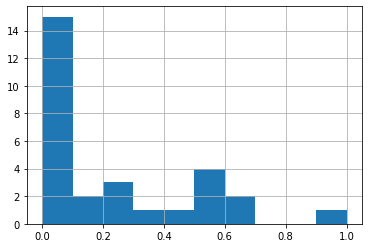

In [9]:
# смотрим распределение значений в stat53
data['stat53'].hist()

In [10]:
# аналогично со случаем в предыдущем задании, удалим этот столбец
data = data.drop(['stat53'], axis=1)

In [11]:
# перебираем каждую колонку кроме 'player'
for i in range(1, data.shape[-1]):
    # если значений в колонке меньше, чем должно быть вывести её на экран
    if data.iloc[:, i].count() < len(data):
        print(f'{data.columns[i]}: {data.iloc[:, i].count()} values')

In [12]:
# проверяем таблицу на дубликаты
# в выходном массиве должно быть одно значение False иначе в таблице есть дубликаты
data.duplicated().unique()

array([False])

In [13]:
# проверяем типы данных
# перебираем все колонки кроме "player"
for i in range(1, data.shape[-1]):
    # если тип данных не float64 вывести параметр на экран
    if data[data.columns[i]].dtype != 'float64':
        print(f'{data.columns[i]} is {data[data.columns[i]].dtype}')

Для ответа на вопрос "Какими диапазонами показателей характеризуется стиль игры данной группы?" мы разделим текущий датафрейм на две части: объединенные игроки и новые игроки.

In [14]:
grouped_players_df = data.iloc[:49, :]
new_players_df = data.iloc[49:, :]

Теперь воспользуемся методом describe из библиотеки pandas для описания статистических характеристик каждого показателя: максимальное и минимальное значения, среднее, квартили, стандартное отклонение и т.д.

In [20]:
grouped_players_df.describe()

,stat1,stat2,stat4,stat5,stat7,stat9,stat11,stat12,stat13,stat14,...,stat113,stat115,stat117,stat118,stat119,stat120,stat121,stat122,stat123,stat125
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.000029,0.540533,0.209573,0.083722,0.619539,0.088133,0.645463,0.103378,0.078916,0.174173,...,0.533279,0.524810,0.303139,0.451366,0.208157,0.317417,0.267814,0.302837,0.009442,0.264321
std,0.000044,0.042097,0.023784,0.017967,0.025093,0.028859,0.045342,0.019171,0.008759,0.016767,...,0.042637,0.019642,0.013051,0.018891,0.010585,0.039710,0.012628,0.017172,0.007946,0.010170
min,0.000000,0.438389,0.165808,0.048795,0.561432,0.030928,0.528707,0.063344,0.050592,0.135017,...,0.432753,0.485176,0.275128,0.424543,0.178428,0.206704,0.242901,0.274049,0.000000,0.244630
25%,0.000000,0.513078,0.193920,0.069825,0.604167,0.066667,0.623690,0.093294,0.073726,0.162665,...,0.503948,0.511203,0.294986,0.439452,0.201608,0.297872,0.258882,0.290530,0.003671,0.258438
50%,0.000000,0.542497,0.212137,0.080989,0.620611,0.088235,0.649620,0.100592,0.080154,0.170047,...,0.536821,0.525614,0.302927,0.445217,0.207946,0.315126,0.266242,0.299060,0.007303,0.261988
75%,0.000037,0.565886,0.228403,0.097610,0.633764,0.106383,0.664804,0.119895,0.084339,0.188033,...,0.558827,0.540113,0.311545,0.462004,0.214464,0.340476,0.276149,0.314882,0.012301,0.269510
max,0.000188,0.623913,0.249847,0.118987,0.685624,0.148515,0.779392,0.151344,0.097127,0.205647,...,0.614509,0.562930,0.330523,0.503048,0.232718,0.433898,0.295311,0.346110,0.034413,0.287544


In [19]:
# подсчет значений (count) в данном случае  является неважной характеристикой
# поэтому мы запишим в excel файл все строки кроме этой
grouped_players_df.describe().iloc[1:, :].to_excel('stats_charachteristics_task3.xlsx')

# Разработка алгоритма отбора

Алгоритм будет строится на базе z-score:
1. Мы создадим экземпляр StandardScaler (для приведения данных к нормальному распределению)
2. Настроим его на данных из первой таблицы с уже сгрупированными игроками
3. Применим настроенный StandardScaler на новых игроках.
4. Если какие-то показатели у нового игрока будут больше определенного z-score по модулю, то есть основания предполагать, что этот игрок не относится к данной группе.

In [47]:
# приводим к стандартному виду таблицу с объединенными игроками
scaler = StandardScaler()
grouped_players_std = scaler.fit_transform(grouped_players_df.iloc[:, 1:].values)

Обычно при выявлении выбросов в данных z-score принимают равным 3. Мы сделаем также, для начала мы посмотрим есть ли в первой таблице игроки с показателями превышающими 3 по модулю.

In [96]:
# для каждого игрока посчитаем колличество параметров где показатель больше 3
outliers_number = []
# переберем всех игроков
for i in range(features_std.shape[0]):
    # все параметры для каждого игрока возьмем по модулю
    x = np.abs(features_std[i, :])
    # вычисляем в скольких парметрах у игрока значения превышают 3 по модулю 
    outliers = len(np.where(x>=3)[0])
    # добавляем это значение в список
    outliers_number.append(outliers)

In [97]:
print(f'Самое большое количество превышений z-score среди всех игроков: {max(outliers_number)}')

Самое большое количество превышений z-score среди всех игроков: 4


Text(0.5, 0, 'Кол-во показателей, характеризуемых как выбросы')

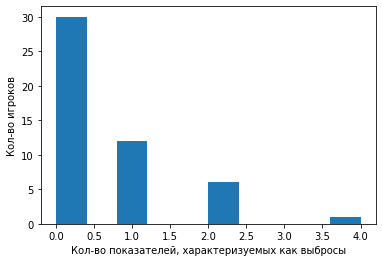

In [99]:
# построим гистограмму распределения
plt.hist(outliers_number)
plt.ylabel('Кол-во игроков')
plt.xlabel('Кол-во показателей, характеризуемых как выбросы')

Мы видим, что у большинства игроков нет показателей выходящих за рамки. На полученных данных мы можем дополнить алгоритм:

5. Если у нового игрока кол-во показателей со значениями превышающими 3 по модулю будет больше 5 (берем с небольшим запасом), есть основания полагать, что этот игрок не принадлежит данному классу.

In [92]:
# приводим показатели новых игроков к стандартному виду
# с использованием показателей полученными при настройке на таблице с объединеными игроками
new_players_std = scaler.transform(new_players_df.iloc[:, 1:].values)

In [101]:
# перебираем всех новых игроков
for i in range(new_players_std.shape[0]):
    # берем все показатели по модулю
    x = np.abs(new_players_std[i, :])
    # если у игрока больше 5 показателей с превышением z-score он не принадлежит группе
    if len(np.where(x>=3)[0]) > 5:
        print(f'{new_players_df.iloc[i, 0]} не принадлежит группе, {len(np.where(x>=3)[0])} параметров с выбросами')
    else:
        print(f'{new_players_df.iloc[i, 0]} принадлежит группе')

new_player1 не принадлежит группе, 25 параметров с выбросами
new_player2 принадлежит группе
new_player3 принадлежит группе
new_player4 не принадлежит группе, 29 параметров с выбросами


# Визуализация результатов

(array([ 4.,  1.,  2., 14., 18., 31., 18.,  2.,  5.,  2.]),
 array([-9.07461322, -7.5000768 , -5.92554039, -4.35100397, -2.77646756,
        -1.20193115,  0.37260527,  1.94714168,  3.5216781 ,  5.09621451,
         6.67075093]),
 <BarContainer object of 10 artists>)

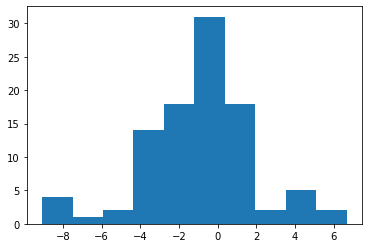

In [102]:
# построим гистограммы параметров новых игроков
# первый игрок
plt.hist(new_players_std[0, :])

(array([ 5., 13.,  9., 12.,  9., 19.,  6.,  7., 13.,  4.]),
 array([-1.68403084, -1.36500549, -1.04598014, -0.7269548 , -0.40792945,
        -0.0889041 ,  0.23012125,  0.5491466 ,  0.86817195,  1.18719729,
         1.50622264]),
 <BarContainer object of 10 artists>)

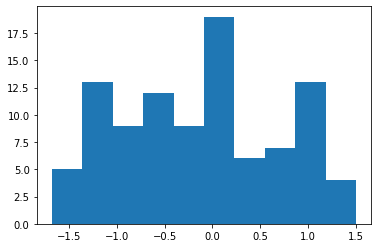

In [103]:
# второй игрок
plt.hist(new_players_std[1, :])

(array([ 2.,  2.,  5., 23., 19., 17., 20.,  8.,  0.,  1.]),
 array([-2.4458016 , -1.91228768, -1.37877377, -0.84525986, -0.31174595,
         0.22176796,  0.75528187,  1.28879578,  1.82230969,  2.3558236 ,
         2.88933751]),
 <BarContainer object of 10 artists>)

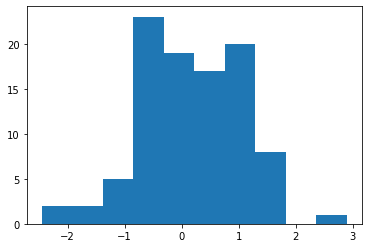

In [104]:
# третий игрок
plt.hist(new_players_std[2, :])

(array([ 2., 13., 20., 25., 23.,  8.,  4.,  0.,  1.,  1.]),
 array([-6.73139484, -5.16550719, -3.59961953, -2.03373188, -0.46784422,
         1.09804343,  2.66393109,  4.22981874,  5.7957064 ,  7.36159405,
         8.92748171]),
 <BarContainer object of 10 artists>)

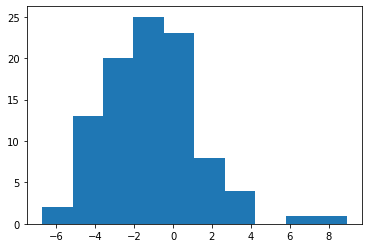

In [105]:
# четвертый игрок
plt.hist(new_players_std[3, :])

На гистограммах четче видно, что у первого и четвертого игрока показатели сильно выходят за рамки и именно по этой причине они не принадлежат к группе.

# Конечный алгоритм

Работа алгоритма продемонстрирована выше, здесь я попытаюсь представить алгоритм для общего случая:

0. Предобработка данных, параметры объединеных игроков и новых игроков должны корректно соотноситься
1. Стандартизировать значения параметров игроков объединенных в группу.
2. Для каждого игрока из группы расчитать сколько параметров превышают z-score=3 по модулю
3. Выбрать максимальное значение из полученного списка и использовать его в качестве критерия (или число немного превышающее максимальное значение)
4. Использовав параметры стандартизации получение на этапе (1) стандартизировать параметры новых игроков
5. Для каждого нового игрока расчитать сколько параметров превышают z-score=3 по модулю
6. Если полученное число больше критерия вычисленного на этапе (3): данный игрок вероятнее всего не принадлежит к данной группе.